## TP1 - Parte 1
### Vision por computadora 1
#### Marcelo Chichiri
▪ Parte 1 (imágenes en white_patch y coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas

## Resolución de la primera parte del Trabajo práctico 1 de Visión por computadora 1

In [1]:
# Carga de librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 ### 1-1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
def leer_imagen_RGB(path):
    imagen = cv.imread(path, cv.IMREAD_COLOR)
    imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    return imagen

In [3]:
def transf_coord_cromaticas(imagen, s=0.01):
    im_R = imagen[:,:,0]
    im_G = imagen[:,:,1]
    im_B = imagen[:,:,2]
    
    denom = (s * im_R + s * im_G + s * im_B)
    
    im_R = np.divide((s * im_R), denom, where=denom!=0)
    im_G = np.divide((s * im_G), denom, where=denom!=0)
    im_B = np.divide((s * im_B), denom, where=denom!=0)
    
    return cv.merge((im_R, im_G, im_B))

In [4]:
def plot_imagenes(nro_rows, nro_cols, imagen_original, imagen_transformada, imagen_nombre, figsize=(12, 6)):
    fig, axes = plt.subplots(nrows=nro_rows, ncols=nro_cols, figsize=figsize)   
    axes[0].set_title(f'Original: {imagen_nombre}')    
    axes[0].imshow(imagen_original)
    axes[1].set_title(f'Transformada: {imagen_nombre}')
    axes[1].imshow(imagen_transformada)
    fig.tight_layout()

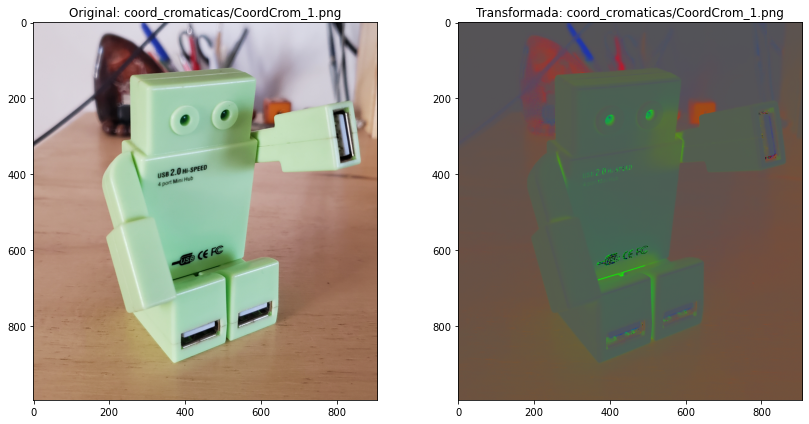

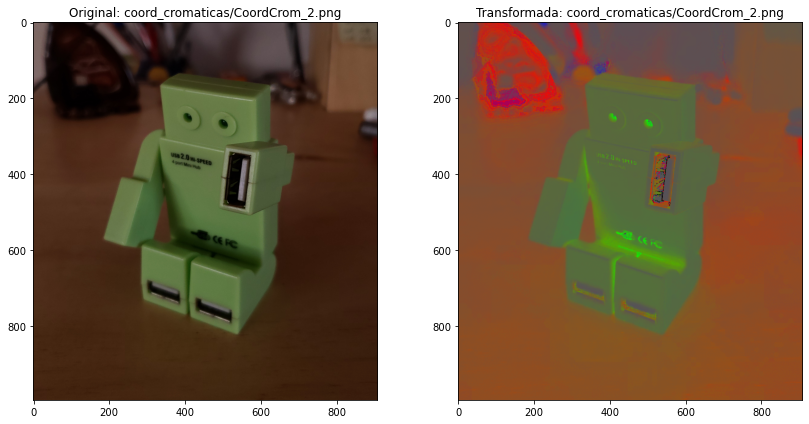

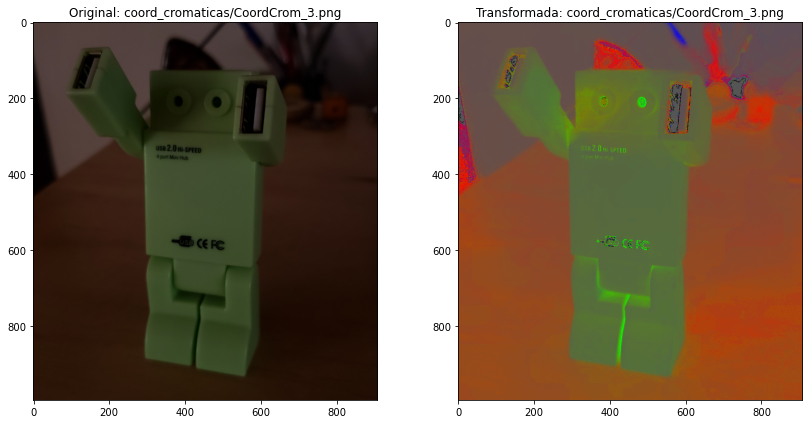

In [5]:
# leer y transforma una imagen
imagenes_cc =  ['coord_cromaticas/CoordCrom_1.png',
                  'coord_cromaticas/CoordCrom_2.png',
                  'coord_cromaticas/CoordCrom_3.png']

for imagenx in imagenes_cc:
    imagen = leer_imagen_RGB(imagenx)
    imagen_transformada = transf_coord_cromaticas(imagen)
    plot_imagenes(nro_rows=1, nro_cols=2, imagen_original=imagen, 
                  imagen_transformada=imagen_transformada, imagen_nombre=imagenx)


### 1-2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [6]:
# Defino función para converir a White patch la imagen RGB
def transf_white_patch(imagen):
    im_R = imagen[:,:,0]
    im_G = imagen[:,:,1]
    im_B = imagen[:,:,2]
    
    w_max = 255
    maximo_R = im_R.max()
    maximo_G = im_G.max()
    maximo_B = im_B.max()
    #print(f'maximo_R : {maximo_R}, maximo_G : {maximo_G}, maximo_B : {maximo_B}')
    
    im_R = im_R * np.divide(w_max, maximo_R, where=maximo_R!=0)
    im_G = im_G * np.divide(w_max, maximo_G, where=maximo_G!=0)
    im_B = im_B * np.divide(w_max, maximo_B, where=maximo_B!=0)
             
    return cv.merge((im_R, im_G, im_B)).astype('uint8'), maximo_R, maximo_G, maximo_B

### 1-3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

imagen white_patch/test_blue.png - maximo Red : 165, maximo Green : 138, maximo Blue : 200
imagen white_patch/test_green.png - maximo Red : 210, maximo Green : 250, maximo Blue : 171
imagen white_patch/test_red.png - maximo Red : 247, maximo Green : 157, maximo Blue : 175


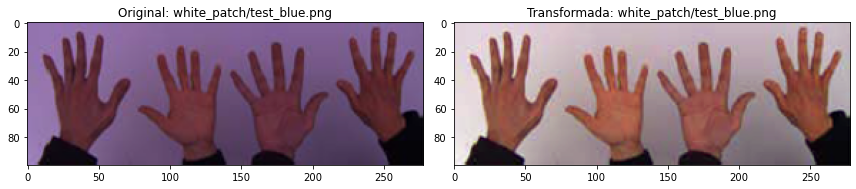

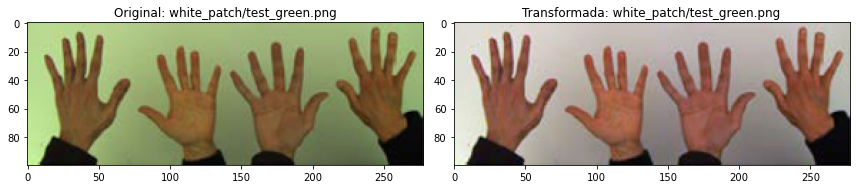

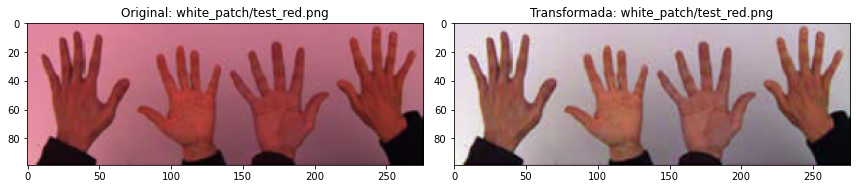

In [7]:
# Leo las imágenes, convierto a White patch y muestro los resultados

imagenes_wp = ['white_patch/test_blue.png',
                  'white_patch/test_green.png',
                  'white_patch/test_red.png']

for imagenx in imagenes_wp:
    imagen = leer_imagen_RGB(imagenx)
    imagen_tr_wp, maxR, maxG, maxB = transf_white_patch(imagen)
    print(f'imagen {imagenx} - maximo Red : {maxR}, maximo Green : {maxG}, maximo Blue : {maxB}')
    plot_imagenes(nro_rows=1, nro_cols=2, imagen_original=imagen, 
                  imagen_transformada=imagen_tr_wp, imagen_nombre=imagenx)

imagen white_patch/wp_blue.jpg - maximo Red : 255, maximo Green : 255, maximo Blue : 255
imagen white_patch/wp_green.png - maximo Red : 126, maximo Green : 252, maximo Blue : 155
imagen white_patch/wp_green2.jpg - maximo Red : 170, maximo Green : 255, maximo Blue : 172


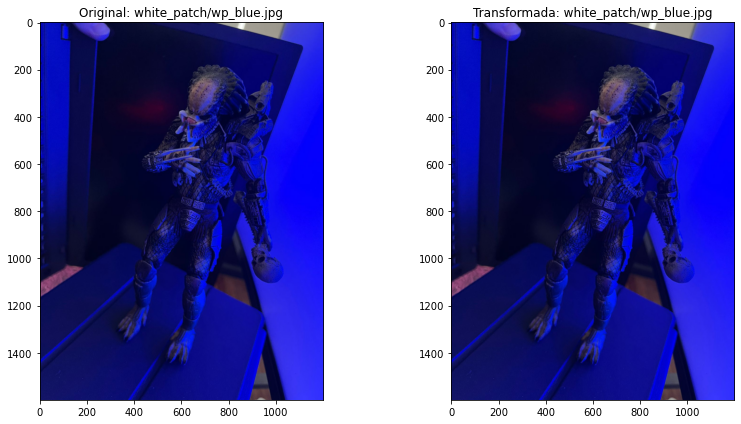

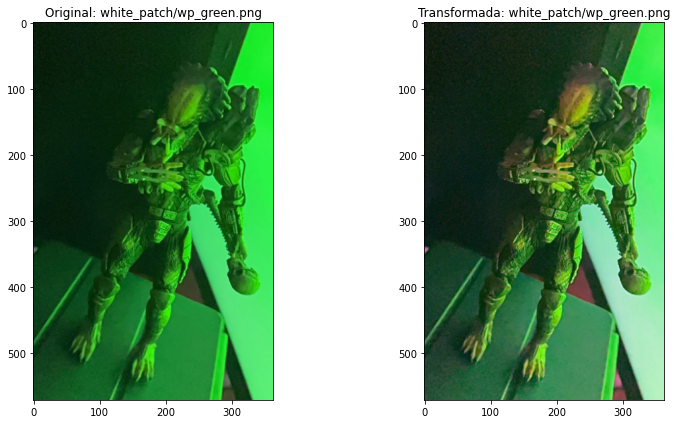

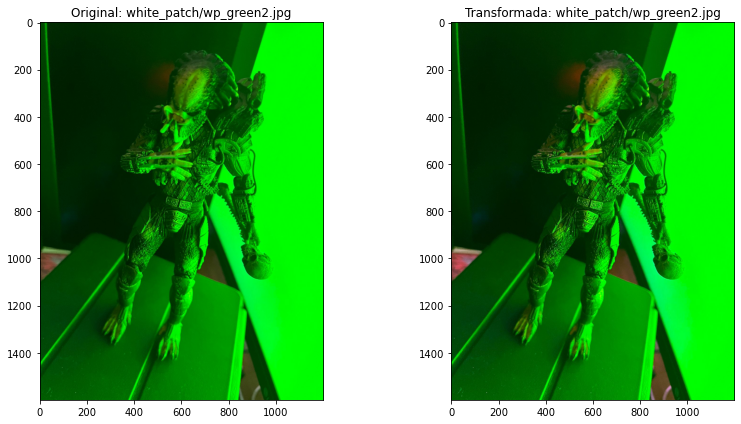

In [8]:
# Leo las imágenes, convierto a White patch y muestro los resultados
imagenes_wp = ['white_patch/wp_blue.jpg',
               'white_patch/wp_green.png',
               'white_patch/wp_green2.jpg']

for imagenx in imagenes_wp:
    imagen = leer_imagen_RGB(imagenx)
    #print(imagen.max())
    imagen_tr_wp, maxR, maxG, maxB  = transf_white_patch(imagen)
    print(f'imagen {imagenx} - maximo Red : {maxR}, maximo Green : {maxG}, maximo Blue : {maxB}')
    plot_imagenes(nro_rows=1, nro_cols=2, imagen_original=imagen, 
                  imagen_transformada=imagen_tr_wp, imagen_nombre=imagenx)

imagen white_patch/wp_red.png - maximo Red : 255, maximo Green : 134, maximo Blue : 122
imagen white_patch/wp_red2.jpg - maximo Red : 255, maximo Green : 201, maximo Blue : 203


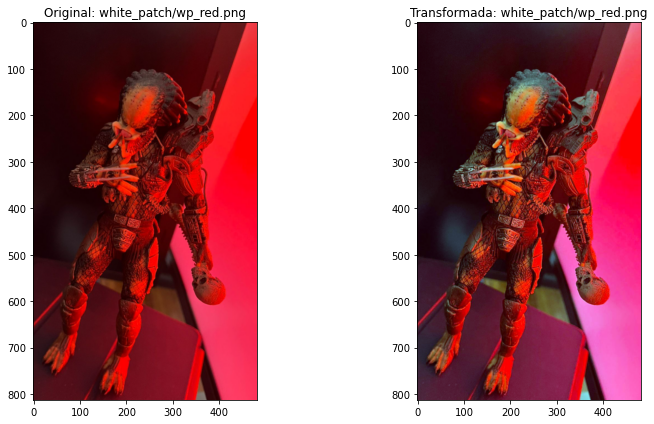

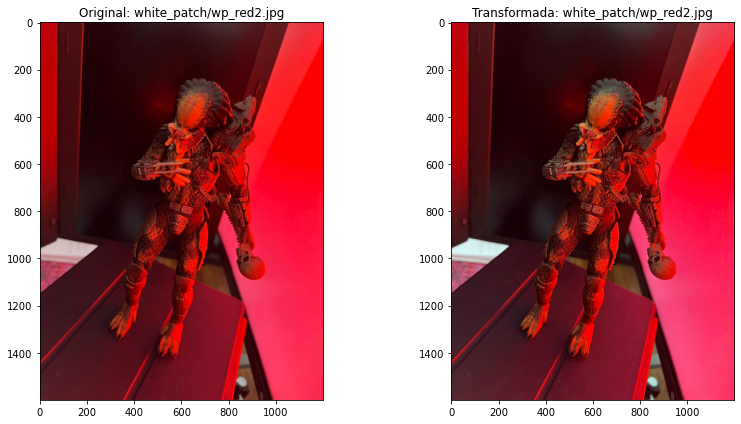

In [9]:
# Leo las imágenes, convierto a White patch y muestro los resultados
imagenes_wp = ['white_patch/wp_red.png',
               'white_patch/wp_red2.jpg']

for imagenx in imagenes_wp:
    imagen = leer_imagen_RGB(imagenx)
    imagen_tr_wp, maxR, maxG, maxB  = transf_white_patch(imagen)
    print(f'imagen {imagenx} - maximo Red : {maxR}, maximo Green : {maxG}, maximo Blue : {maxB}')
    plot_imagenes(nro_rows=1, nro_cols=2, imagen_original=imagen, 
                  imagen_transformada=imagen_tr_wp, imagen_nombre=imagenx)

### Conclusion sobre aplicación de White Patch

Cuando la intensidad máxima de alguno de los canales es la máxima posible (por ejemplo 255 para pixeles de 8 bits) el resultado de la división w_max/maximo_x (ver nota), que multiplica al valor de intensidad del pixel original, es 1 y por lo tanto el valor del pixel original no se ve afectado, quedando con el mismo valor. Dado que el valor máximo se toma en toda la imagen, con que un pixel tenga el máximo posible es suficiente para que ese color no se vea modificado.\
Por ejemplo, en la imagen white_patch/wp_blue.jp todos los canales tienen valor máximo 255, por lo cual la imagen no se modifica.La imagen white_patch/wp_red.png tiene un maximo de 255 en el canal rojo pero no en el canal verde ni azul, por lo cual solo el canal rojo no se ve modificado.

Nota : en la ecuación w_max/maximo_x, 'w_max' es 255 para pixeles de 8 bits y 'x' en 'maximo_x' representa cada canal (R, G, B)